In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found here.

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [91]:
df = pd.read_csv("/data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [92]:
df['location_full'].nunique()

106

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [94]:
df.loc[df['qs_overall_score']=='-', 'qs_overall_score'] = '0.0'
df['qs_overall_score'] = df['qs_overall_score'].astype(float)

In [95]:
scores = df[['academic_reputation',
    'employer_reputation',
    'faculty_student',
    'citations_per_faculty',
    'international_faculty',
    'international_students',
    'international_research_network',
    'employment_outcomes',
    'sustainability']]

In [96]:
df_acad_sort=df.sort_values(by=['academic_reputation'], ascending=False)
df_acarep=df_acad_sort.loc[(df_acad_sort['academic_reputation'] >= 80) & (df_acad_sort['academic_reputation'] <=100)]
df_acarep

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1
32,32,28,The University of Tokyo,JP,Japan,L,100.0,99.8,89.3,57.3,10.1,29.7,87.4,99.9,98.3,82.1
41,42,29,"University of California, Los Angeles (UCLA)",US,United States,XL,100.0,99.8,35.4,74.0,42.2,22.3,95.5,94.7,67.1,79.8
11,12,10,"University of California, Berkeley (UCB)",US,United States,XL,100.0,100.0,23.5,98.2,91.5,61.0,97.2,98.4,100.0,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,76,Yonsei University,KR,South Korea,L,81.5,97.0,84.2,44.1,20.7,51.2,78.7,87.8,88.9,72.9
46,47,60,The Hong Kong University of Science and Techno...,HK,Hong Kong SAR,M,81.1,50.3,56.7,99.7,100.0,95.4,46.7,65.4,77.6,77.1
132,133,154,Alma Mater Studiorum - University of Bologna,IT,Italy,XL,80.8,47.8,3.7,46.6,14.5,12.3,96.0,53.8,88.4,54.1
131,132,134,Sapienza University of Rome,IT,Italy,XL,80.7,48.5,5.0,45.3,3.1,8.0,97.1,88.0,72.3,54.2


In [97]:
df['is_us'] = df['location_full'] == 'United States'
df['us_location'] = df['location_full'].where(df['is_us'], other=None)
df['location_full'] = df['location_full'].where(~df['is_us'], other=df['location_full'])
df['int_location'] = df['location_full'].where(~df['is_us'], other=None)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [118]:
uni_df = df['institution_name'].value_counts()

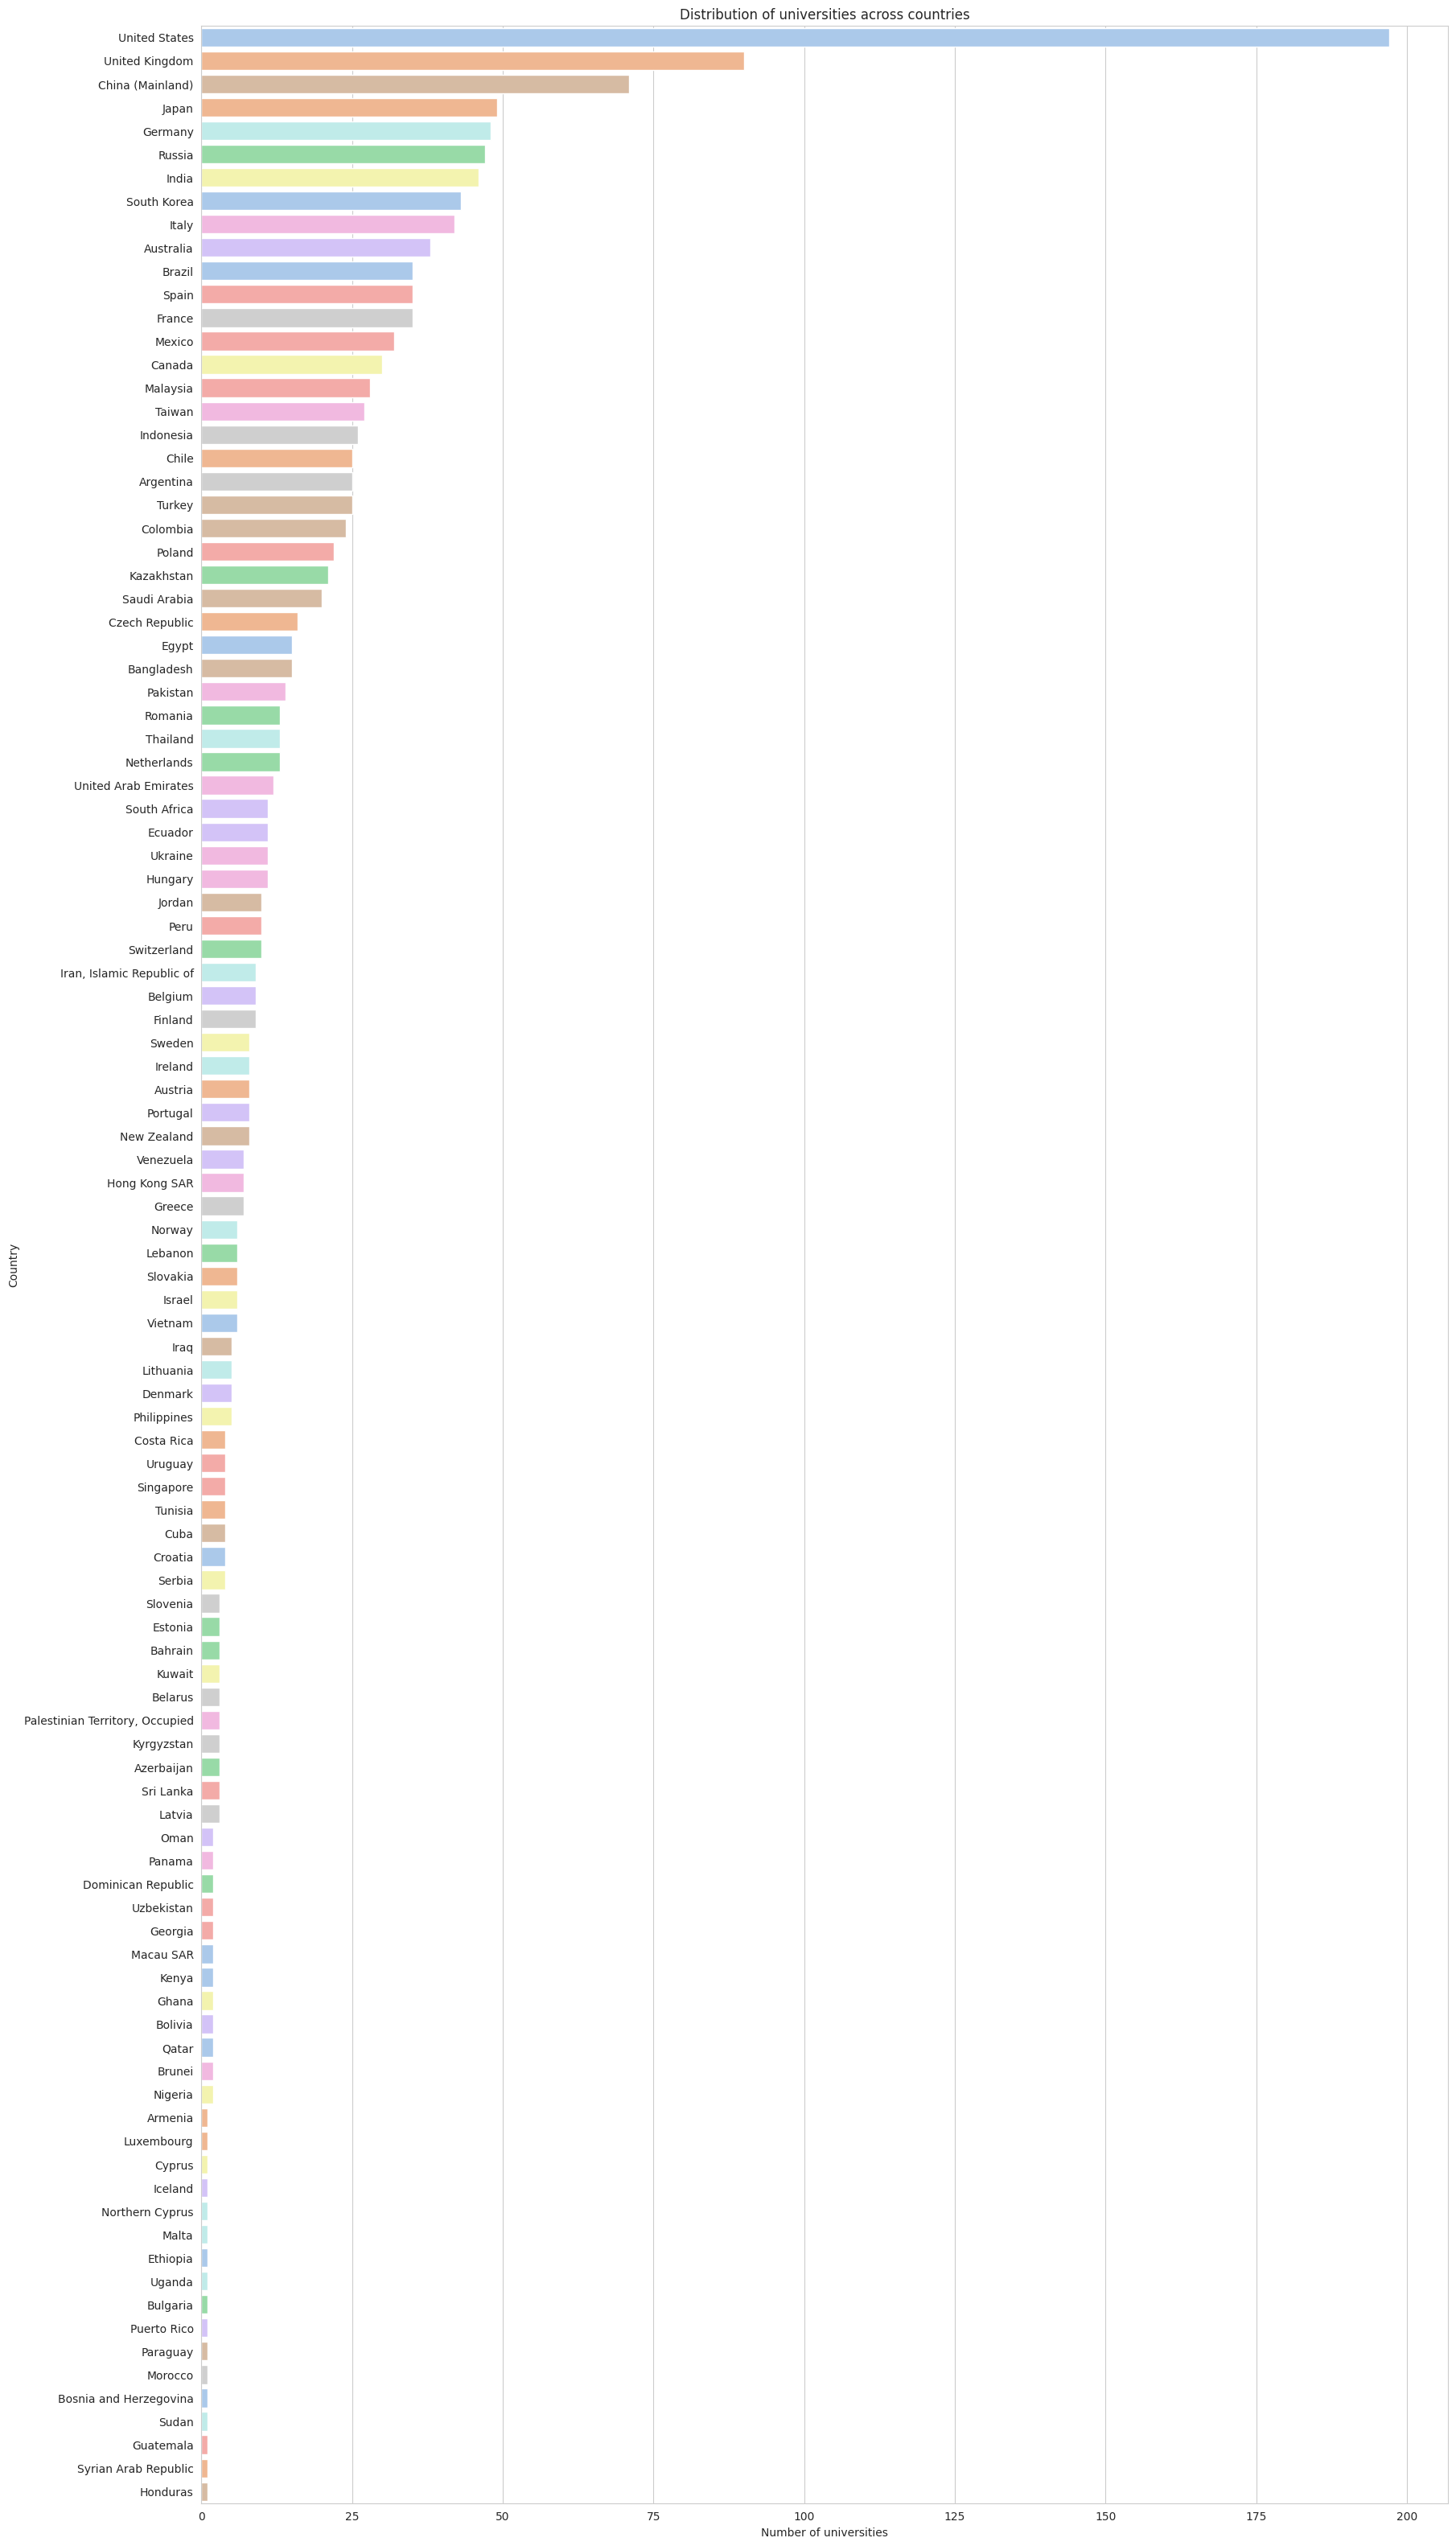

In [134]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(data=df, y='location_full', order=df.location_full.value_counts().index, palette="pastel", hue="location_full")
plt.xlabel('Number of universities')
plt.ylabel('Country')
plt.title("Distribution of universities across countries")
plt.show()

Below, is a correlation map between the scored categories. In this section, I will show which factors most strongly correlate with employer outcomes. Strong correlations may indicate what factors would lead to employment after school.
In the heat map below, it appears that the strongest coorelation is with academic reputation, which is unsurprising. Also unsurprising is the coorelation employer reputation.
Employer reputation has a high coorelation with academic reputation. This is arguably just as important as, or more important than, employment outcomes, given all of the variables that could go into the outcomes.

<Axes: >

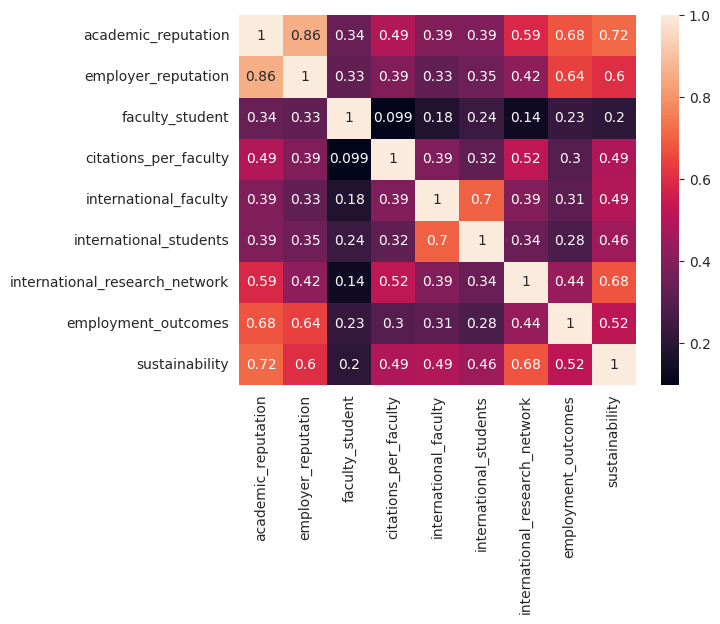

In [99]:
import numpy as np
scores = scores.replace('NAType', np.nan).astype(float)
score_heat_map = scores.corr()

sns.heatmap(score_heat_map, annot=True)

Here is a scatter plot showing the strong positive correlation between academic reputation and employer reputation in the United States. This suggests that when seeking a program in the U.S., it would be wise to consider academic reputation when considering future job prospects.

<Axes: xlabel='academic_reputation', ylabel='employer_reputation'>

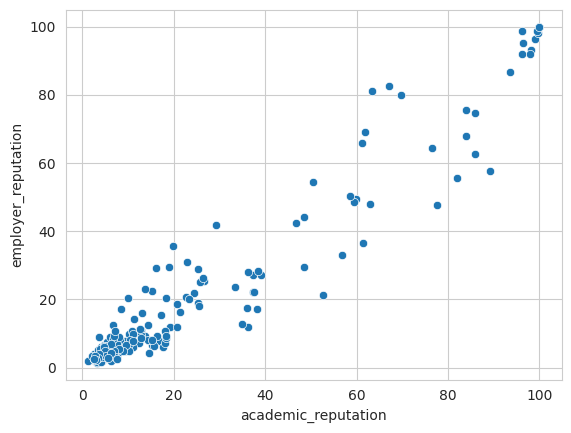

In [100]:
US_schools=df['location_full']=='United States'
sns.scatterplot(x='academic_reputation', y='employer_reputation', data=df[US_schools])

As was the case with the schools in the US, the scatter plot below shows a strong positive correlation between academic reputation and employer reputation in international schools. This suggests that when seeking a program internationally, it would be wise to consider academic reputation when considering future job prospects.

<Axes: xlabel='academic_reputation', ylabel='employer_reputation'>

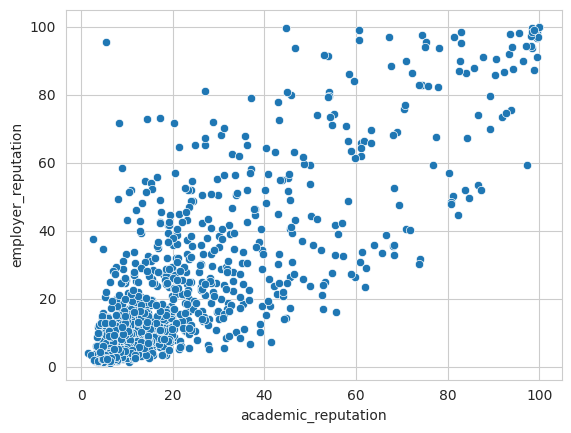

In [101]:
int_schools=df['location_full']!='United States'
sns.scatterplot(x='academic_reputation', y='employer_reputation', data=df[int_schools])

The same can be said for employment outcomes in the US and internationally, as seen below.

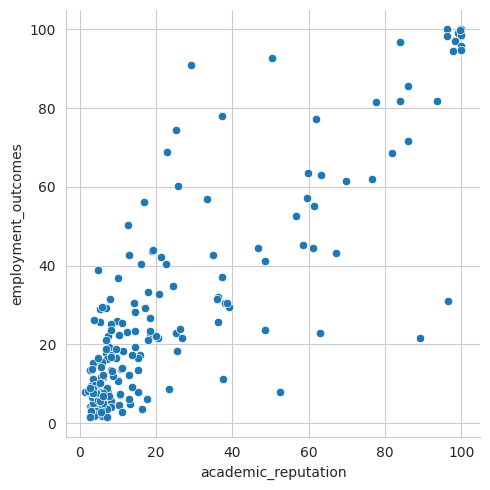

In [102]:
sns.relplot(x='academic_reputation', y='employment_outcomes', data=df[US_schools], kind='scatter')

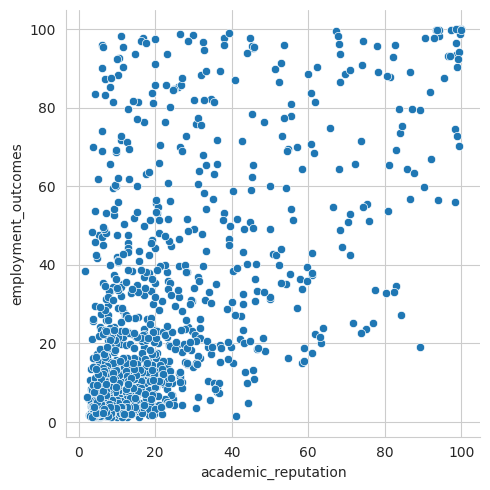

In [103]:
sns.relplot(x='academic_reputation', y='employment_outcomes', data=df[int_schools], kind='scatter')

The next visualization examines coorelation between the sustainability score and the size of the school. It is safe to say that the bigger the school, the higher the sustainability score. There is a particularly big jump in score between a medium and large sized program.

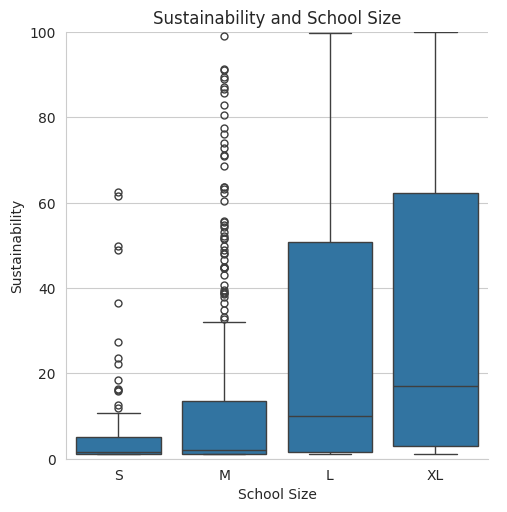

In [104]:
size_order = ["S", "M", "L", "XL"]
sns.catplot(x='size', y='sustainability', data=df, kind='box', order=size_order)
plt.title('Sustainability and School Size')
plt.xlabel('School Size')
plt.ylabel('Sustainability')
plt.ylim(0, 100)
plt.show()

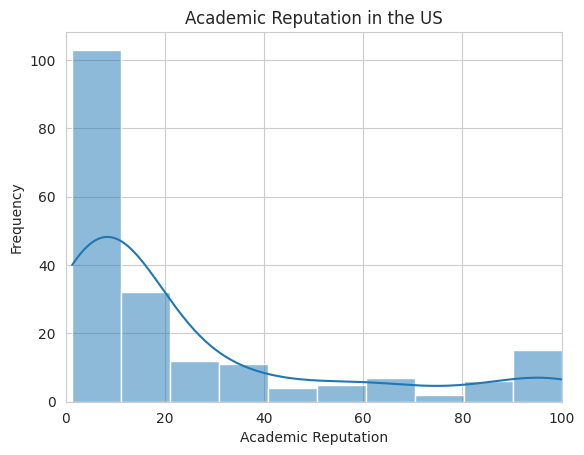

In [105]:
sns.set_style('whitegrid')
sns.histplot(x='academic_reputation', data=df[US_schools], kde=True, bins=10)
plt.title('Academic Reputation in the US')
plt.xlabel('Academic Reputation')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

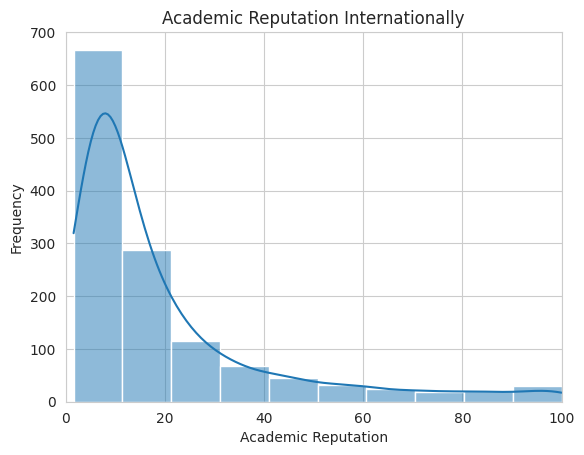

In [106]:
sns.set_style('whitegrid')
sns.histplot(x='academic_reputation', data=df[int_schools], kde=True, bins=10)
plt.title('Academic Reputation Internationally')
plt.xlabel('Academic Reputation')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

According to the box plot below, XL academic institutions have the highest academic reputation score.

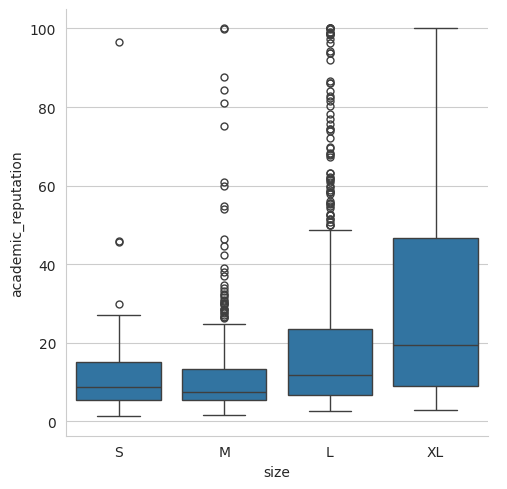

In [113]:
size_order = ["S", "M", "L", "XL"]
sns.catplot(x='size', y='academic_reputation', data=df, kind='box', order=size_order)